In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# from ROI_extraction import preprocess_image
import cv2
import os
import sys
sys.path.append("..")
from common_functions import HSV_features_generation

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_text
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import seaborn as sns

def eval_decision_tree(X,y,max_depth):
    # Initialize a list to store the accuracy scores
    accuracy_scores = []
    val_accuracy_scores = []
    features_weights = []
    confusion_matrixs = []
    val_confusion_matrixs = []
    
    # Nombre de plis pour la validation croisée k-fold
    k = 4

    # Créer une instance de StratifiedKFold avec k plis
    skf = StratifiedKFold(n_splits=k)

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(f"Fold {i}:")
        # Diviser les données d'entraînement et de validation pour ce pli
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]

        y_train, y_val = y[train_index], y[test_index]

        # Création de l'arbre de décision
        decision_tree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
        
        # Entraînement de l'arbre de décision
        decision_tree.fit(X_train, y_train)

        # Prédiction sur les données de test
        y_train_pred = decision_tree.predict(X_train)
        y_val_pred = decision_tree.predict(X_val)


        # Calculate the accuracy score
        accuracy = metrics.accuracy_score(y_train, y_train_pred)
        val_accuracy = metrics.accuracy_score(y_val, y_val_pred)

        confusion_mat = confusion_matrix(y_train, y_train_pred)
        confusion_mat_val = confusion_matrix(y_val, y_val_pred)

        print(f'Fold {i} accuracy : {accuracy}, val accuracy :{val_accuracy}')

        # Append the accuracy score to the list
        accuracy_scores.append(accuracy)
        val_accuracy_scores.append(val_accuracy)
        features_weights.append(decision_tree.feature_importances_) 
        confusion_matrixs.append(confusion_mat)
        val_confusion_matrixs.append(confusion_mat_val)

        # Affichage des poids des caractéristiques
        print(f"Poids caractéristiques : {decision_tree.feature_importances_}")
        r = export_text(decision_tree, feature_names=X_train.columns.values.tolist())
        #Affichage arbre
        print(r,'\n')


    # Compute the average accuracy across all folds
    print('-------------------')
    print(f"Train accuracy : {np.mean(accuracy_scores)}")
    print(f"Val accuracy : {np.mean(val_accuracy_scores)}")
    features_weights = np.array(features_weights)
    average_weights = [features_weights[:,i].mean() for i in range(6)]
    print('Average feature weights',average_weights)

    # Filtrer les poids et les noms des features pour exclure les valeurs nulles
    filtered_weights = [w for w in average_weights if w != 0]
    filtered_feature_names = [name for name, w in zip(['H_mean','H_std','S_mean','S_std','V_mean','V_std'], average_weights) if w != 0]

    plt.pie(filtered_weights, labels=filtered_feature_names, autopct='%1.1f%%')
    plt.show()

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Vraie étiquette')
    ax.set_title('Matrice de confusion')
    print('Average confusion matrix')
    sns.heatmap(np.mean(confusion_matrixs, axis=0), annot=True, cmap="Blues", ax=ax, fmt='.0f')
    plt.show()

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Vraie étiquette')
    ax.set_title('Matrice de confusion val')
    print('Average val confusion matrix')
    sns.heatmap(np.mean(val_confusion_matrixs, axis=0), annot=True, cmap="Blues", ax=ax, fmt='.0f')
    plt.show()

    return np.mean(accuracy_scores),np.mean(val_accuracy_scores),np.array(average_weights)



In [3]:
#raw
X,y = HSV_features_generation('../images/raw_pollub/')


Fold 0:
Fold 0 accuracy : 0.6667553899387809, val accuracy :0.6664006384676776
Poids caractéristiques : [0. 1. 0. 0. 0. 0.]
|--- H_std <= 39.91
|   |--- class: 2
|--- H_std >  39.91
|   |--- class: 0
 

Fold 1:
Fold 1 accuracy : 0.6667553899387809, val accuracy :0.6664006384676776
Poids caractéristiques : [0. 1. 0. 0. 0. 0.]
|--- H_std <= 39.85
|   |--- class: 2
|--- H_std >  39.85
|   |--- class: 0
 

Fold 2:
Fold 2 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0. 1. 0. 0. 0. 0.]
|--- H_std <= 39.91
|   |--- class: 1
|--- H_std >  39.91
|   |--- class: 0
 

Fold 3:
Fold 3 accuracy : 0.6668440659925492, val accuracy :0.6661341853035144
Poids caractéristiques : [0. 1. 0. 0. 0. 0.]
|--- H_std <= 39.91
|   |--- class: 1
|--- H_std >  39.91
|   |--- class: 0
 

-------------------
Train accuracy : 0.666799727965665
Val accuracy : 0.666267411885596
Average feature weights [0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


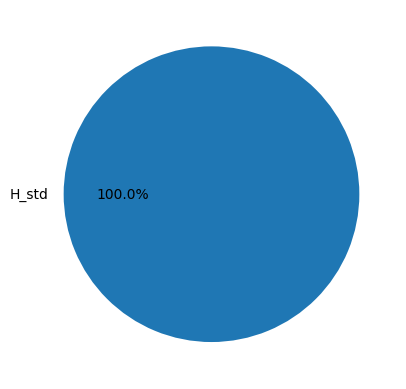

Average confusion matrix


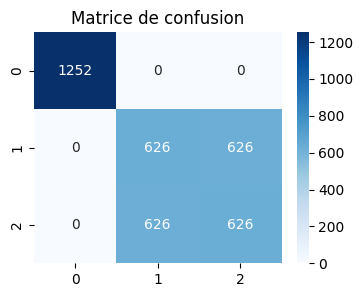

Average val confusion matrix


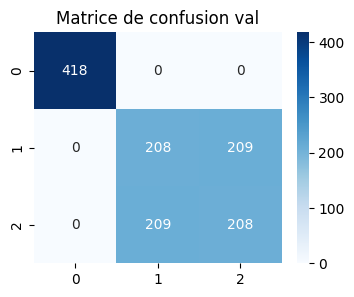

Fold 0:
Fold 0 accuracy : 0.8645195634815012, val accuracy :0.8411811652035116
Poids caractéristiques : [0.        0.7255313 0.        0.2744687 0.        0.       ]
|--- H_std <= 39.91
|   |--- S_std <= 84.25
|   |   |--- class: 2
|   |--- S_std >  84.25
|   |   |--- class: 1
|--- H_std >  39.91
|   |--- class: 0
 

Fold 1:
Fold 1 accuracy : 0.864785733297844, val accuracy :0.8691141260973663
Poids caractéristiques : [0.        0.7388222 0.        0.2611778 0.        0.       ]
|--- H_std <= 39.85
|   |--- S_std <= 84.82
|   |   |--- class: 2
|   |--- S_std >  84.82
|   |   |--- class: 1
|--- H_std >  39.85
|   |--- class: 0
 

Fold 2:
Fold 2 accuracy : 0.8861096327833954, val accuracy :0.8250798722044729
Poids caractéristiques : [0.         0.69718157 0.         0.30281843 0.         0.        ]
|--- H_std <= 39.91
|   |--- S_std <= 84.57
|   |   |--- class: 2
|   |--- S_std >  84.57
|   |   |--- class: 1
|--- H_std >  39.91
|   |--- class: 0
 

Fold 3:
Fold 3 accuracy : 0.8767961681

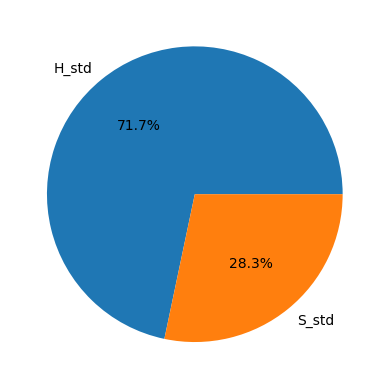

Average confusion matrix


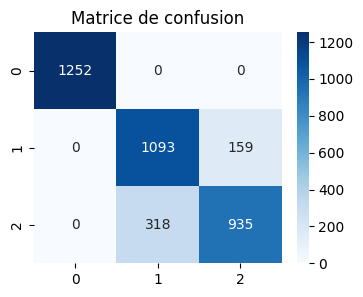

Average val confusion matrix


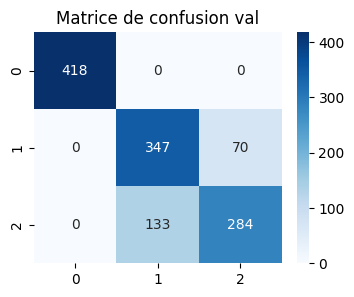

Fold 0:
Fold 0 accuracy : 0.90018631887144, val accuracy :0.87390263367917
Poids caractéristiques : [0.12292721 0.63634376 0.         0.24072903 0.         0.        ]
|--- H_std <= 39.91
|   |--- S_std <= 84.25
|   |   |--- H_mean <= 15.02
|   |   |   |--- class: 1
|   |   |--- H_mean >  15.02
|   |   |   |--- class: 2
|   |--- S_std >  84.25
|   |   |--- H_mean <= 15.22
|   |   |   |--- class: 1
|   |   |--- H_mean >  15.22
|   |   |   |--- class: 2
|--- H_std >  39.91
|   |--- class: 0
 

Fold 1:
Fold 1 accuracy : 0.8945967527282406, val accuracy :0.9138068635275339
Poids caractéristiques : [0.11428343 0.65438706 0.         0.23132951 0.         0.        ]
|--- H_std <= 39.85
|   |--- S_std <= 84.82
|   |   |--- H_mean <= 15.08
|   |   |   |--- class: 1
|   |   |--- H_mean >  15.08
|   |   |   |--- class: 2
|   |--- S_std >  84.82
|   |   |--- H_mean <= 15.38
|   |   |   |--- class: 1
|   |   |--- H_mean >  15.38
|   |   |   |--- class: 2
|--- H_std >  39.85
|   |--- class: 0
 

Fo

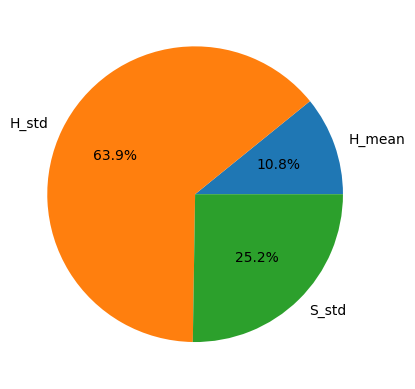

Average confusion matrix


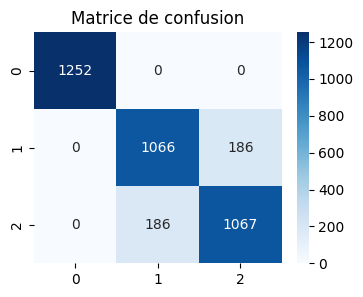

Average val confusion matrix


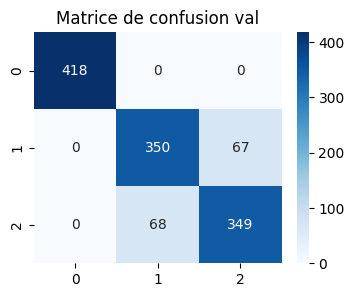

Fold 0:
Fold 0 accuracy : 0.9299973383018366, val accuracy :0.8922585794094174
Poids caractéristiques : [0.11595401 0.60214134 0.         0.28190465 0.         0.        ]
|--- H_std <= 39.91
|   |--- S_std <= 84.25
|   |   |--- H_mean <= 15.02
|   |   |   |--- S_std <= 83.46
|   |   |   |   |--- class: 2
|   |   |   |--- S_std >  83.46
|   |   |   |   |--- class: 1
|   |   |--- H_mean >  15.02
|   |   |   |--- H_std <= 34.78
|   |   |   |   |--- class: 2
|   |   |   |--- H_std >  34.78
|   |   |   |   |--- class: 2
|   |--- S_std >  84.25
|   |   |--- H_mean <= 15.22
|   |   |   |--- S_std <= 85.00
|   |   |   |   |--- class: 1
|   |   |   |--- S_std >  85.00
|   |   |   |   |--- class: 1
|   |   |--- H_mean >  15.22
|   |   |   |--- S_std <= 85.61
|   |   |   |   |--- class: 2
|   |   |   |--- S_std >  85.61
|   |   |   |   |--- class: 1
|--- H_std >  39.91
|   |--- class: 0
 

Fold 1:
Fold 1 accuracy : 0.9174873569337237, val accuracy :0.9401436552274541
Poids caractéristiques : [0.

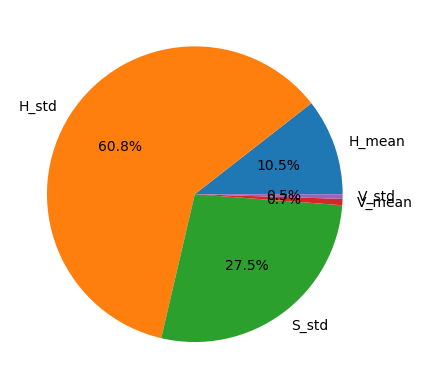

Average confusion matrix


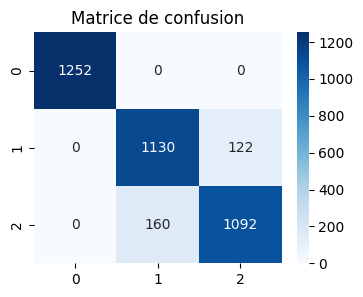

Average val confusion matrix


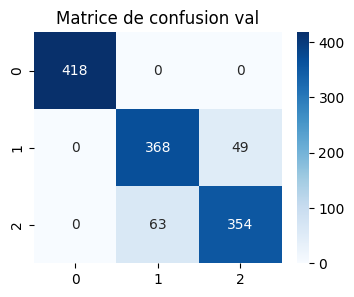

Fold 0:
Fold 0 accuracy : 0.9544849614053766, val accuracy :0.931364724660814
Poids caractéristiques : [0.11238791 0.56433121 0.05482434 0.26845653 0.         0.        ]
|--- H_std <= 39.91
|   |--- S_std <= 84.25
|   |   |--- H_mean <= 15.02
|   |   |   |--- S_std <= 83.46
|   |   |   |   |--- S_std <= 83.42
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- S_std >  83.42
|   |   |   |   |   |--- class: 2
|   |   |   |--- S_std >  83.46
|   |   |   |   |--- H_mean <= 14.82
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- H_mean >  14.82
|   |   |   |   |   |--- class: 1
|   |   |--- H_mean >  15.02
|   |   |   |--- H_std <= 34.78
|   |   |   |   |--- S_std <= 83.70
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- S_std >  83.70
|   |   |   |   |   |--- class: 2
|   |   |   |--- H_std >  34.78
|   |   |   |   |--- H_std <= 34.96
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- H_std >  34.96
|   |   |   |   |   |--- class: 2
|   |--- S_std >  84.25
|   |   |--- 

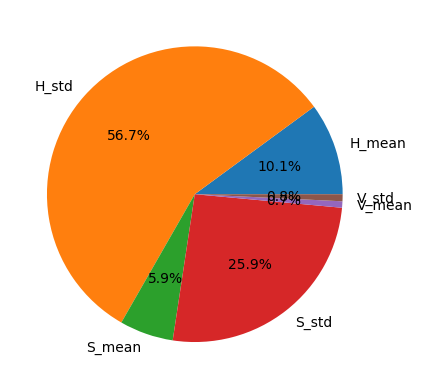

Average confusion matrix


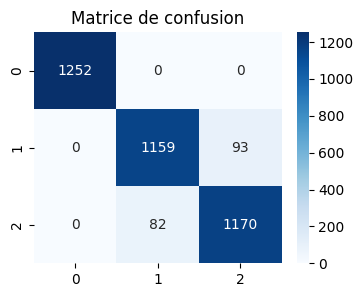

Average val confusion matrix


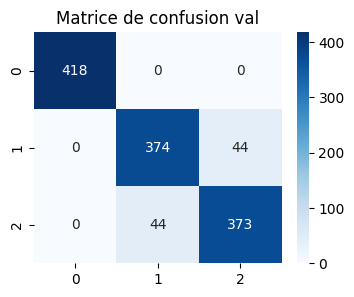

Fold 0:
Fold 0 accuracy : 0.9635347351610327, val accuracy :0.9417398244213887
Poids caractéristiques : [0.10867617 0.54760613 0.06485005 0.27410127 0.         0.00476639]
|--- H_std <= 39.91
|   |--- S_std <= 84.25
|   |   |--- H_mean <= 15.02
|   |   |   |--- S_std <= 83.46
|   |   |   |   |--- S_std <= 83.42
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- S_std >  83.42
|   |   |   |   |   |--- S_std <= 83.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- S_std >  83.43
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- S_std >  83.46
|   |   |   |   |--- H_mean <= 14.82
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- H_mean >  14.82
|   |   |   |   |   |--- S_mean <= 142.07
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- S_mean >  142.07
|   |   |   |   |   |   |--- class: 2
|   |   |--- H_mean >  15.02
|   |   |   |--- H_std <= 34.78
|   |   |   |   |--- S_std <= 83.70
|   |   |   |   |   |--- S_std <= 83.52
|   |   |   |   |   |   

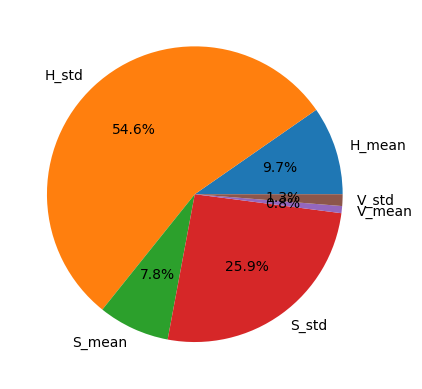

Average confusion matrix


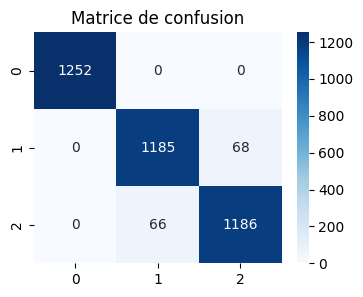

Average val confusion matrix


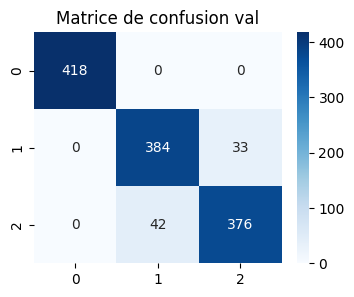

In [29]:
accuracies = []
val_accuracies = []
features_weightss = []
for max_depth in range(1,7):
    accuracy,val_accuracy,features_weights = eval_decision_tree(X,y,max_depth)
    accuracies.append(accuracy)
    val_accuracies.append(val_accuracy)
    features_weightss.append(features_weights)


Text(0, 0.5, 'Accuracy')

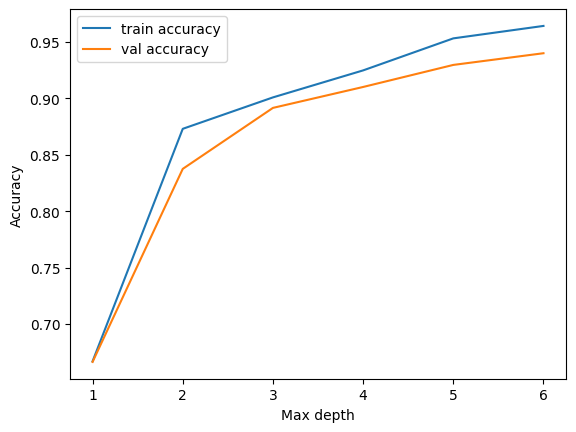

In [27]:
plt.plot(np.arange(1, len(accuracies) + 1),accuracies, label='train accuracy')
plt.plot(np.arange(1, len(val_accuracies) + 1),val_accuracies, label='val accuracy')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Feature weights')

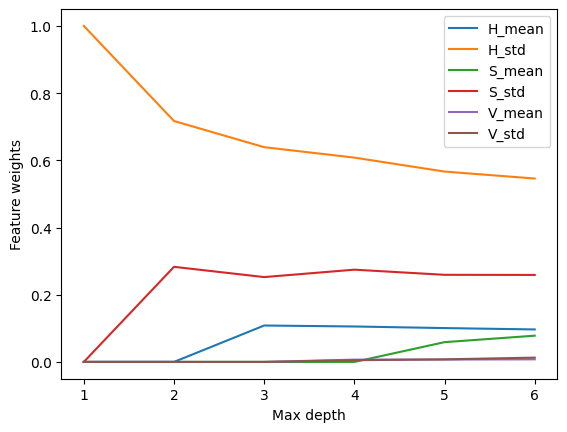

In [28]:
plt.clf()
for f in range(6):
    plt.plot(np.arange(1, len(features_weightss) + 1),[features_weightss[i][f] for i in range(6)],label=['H_mean','H_std','S_mean','S_std','V_mean','V_std'][f])

plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Feature weights')

In [ ]:
#ROI
X,y = HSV_features_generation('../images/ROI_pollub/')